# Load data

In [58]:
import pandas as pd
import seaborn as sns
import opendatasets as od

In [13]:
dataset = 'https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  bob1ch


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023


100%|███████████████████████████████████████████████████████████████████████████| 140M/140M [00:13<00:00, 10.5MB/s]


In [32]:
selected_columns = ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'CRS_DEP_TIME', 'DISTANCE', 'CANCELLED']

In [51]:
df = pd.read_csv('./flight-delay-and-cancellation-dataset-2019-2023/flights_sample_3m.csv', usecols=selected_columns, index_col='FL_DATE')
df

,AIRLINE_CODE,FL_NUMBER,CRS_DEP_TIME,CANCELLED,DISTANCE
FL_DATE,,,,,
2019-01-09,UA,1562,1155,0.0,1065.0
2022-11-19,DL,1149,2120,0.0,1399.0
2022-07-22,UA,459,954,0.0,680.0
2023-03-06,DL,2295,1609,0.0,1589.0
2020-02-23,NK,407,1840,0.0,985.0
...,...,...,...,...,...
2022-11-13,AA,1522,1742,0.0,328.0
2022-11-02,AA,1535,1300,0.0,977.0
2022-09-11,DL,2745,534,0.0,151.0


In [52]:
print(f'before duplicates: {len(df)}')
df.drop_duplicates(inplace=True)
print(f'after drop duplicates {len(df)}') 

before duplicates: 3000000
after drop duplicates 996448


In [53]:
df = pd.get_dummies(df, columns=['AIRLINE_CODE'], dtype=int)

In [54]:
df.reset_index()

,FL_DATE,FL_NUMBER,CRS_DEP_TIME,CANCELLED,DISTANCE,AIRLINE_CODE_9E,AIRLINE_CODE_AA,AIRLINE_CODE_AS,AIRLINE_CODE_B6,AIRLINE_CODE_DL,...,AIRLINE_CODE_HA,AIRLINE_CODE_MQ,AIRLINE_CODE_NK,AIRLINE_CODE_OH,AIRLINE_CODE_OO,AIRLINE_CODE_QX,AIRLINE_CODE_UA,AIRLINE_CODE_WN,AIRLINE_CODE_YV,AIRLINE_CODE_YX
0,2019-01-09,1562,1155,0.0,1065.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2022-11-19,1149,2120,0.0,1399.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-07-22,459,954,0.0,680.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2023-03-06,2295,1609,0.0,1589.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-23,407,1840,0.0,985.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996443,2022-04-18,3241,2015,0.0,67.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996444,2023-04-11,3553,1644,0.0,237.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
996445,2023-07-09,4296,1734,1.0,187.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996446,2021-04-05,287,1715,0.0,1400.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

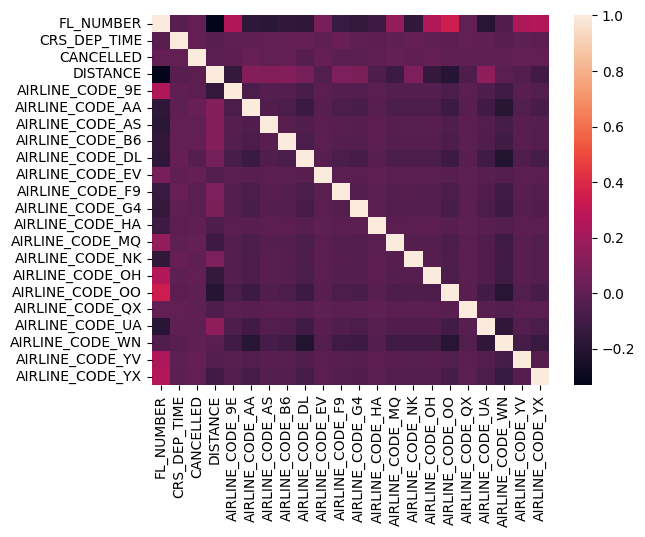

In [59]:
sns.heatmap(df.corr(method='spearman'))